In [1]:
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
import time
import os
import pickle
from utils.plots import output_to_keypoint, colors, plot_one_box_kpt

# Configurations
view_img = False
save_demo_video = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torch.load('yolov7-w6-pose.pt', map_location=device)['model']
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

device

device(type='cuda', index=0)

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.__version__

'2.1.2+cu118'

In [39]:
import pickle
with open("../result.pickle", "rb") as f:
    result = pickle.load(f)
len(result)

6

In [40]:
result

[('data_test/_-uQj-_8M2A_(106.18-106.82-109.31).mp4',
  array([[[[       1214,      251.12],
           [       1220,      244.12],
           [       1207,      244.62],
           ...,
           [       1200,      353.75],
           [       1253,         377],
           [       1207,       376.5]],
  
          [[       1214,         251],
           [       1220,         244],
           [       1207,      244.62],
           ...,
           [       1200,      354.75],
           [       1255,       377.5],
           [       1208,         377]],
  
          [[       1422,      11.078],
           [       1427,      7.0469],
           [       1417,      6.5938],
           ...,
           [       1402,         120],
           [       1442,      130.38],
           [       1405,         130]],
  
          ...,
  
          [[       1726,       237.5],
           [       1733,      230.12],
           [       1719,       230.5],
           ...,
           [       1709,         

In [41]:
result[0][1].shape, result[0][2].shape
# (people_count, frames, keypoints, coordinate)

((2, 16, 17, 2), (2, 16, 17))

In [42]:
result[0][1][0][0]

array([[       1214,      251.12],
       [       1220,      244.12],
       [       1207,      244.62],
       [       1231,      244.88],
       [       1197,         247],
       [       1252,      279.75],
       [       1186,       282.5],
       [       1263,         320],
       [       1177,         321],
       [       1234,         313],
       [       1202,      307.25],
       [       1244,         348],
       [       1201,      348.75],
       [       1253,      353.75],
       [       1200,      353.75],
       [       1253,         377],
       [       1207,       376.5]])

In [26]:
import os

original_path = '480p_1218'
original_video_path = 'data_original_1218'
output_path = 'data_new_1218'

filenames = os.listdir(original_path)
file_count = len(filenames)

id_list = []
for index, filename in enumerate(filenames):
    if 'train' in filename:
        continue
    id = filename.split('(')[0][:-1]
    if id[0] == '.':
        id = id[2:]
    interval = list(map(float, filename.split('(')[1].split(')')[0].split('-')))
    id_list.append(f"{id}-{filename.split('(')[1].split(')')[0]}")
print(id_list[0])
print(file_count, len(id_list), len(set(id_list))*2)

0Y2Z7vCcLec-144.13-145.82-149.16
754 377 378


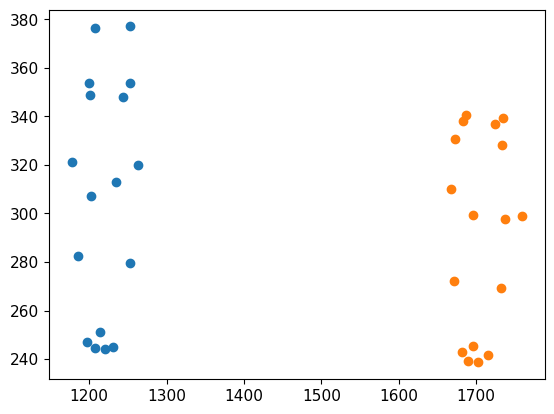

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

for people in result[0][1]:
    keypoint = people[0]
    plt.scatter(*zip(*keypoint))

plt.show()